In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [53]:
X,y = make_blobs(n_samples=500, n_features=2, centers=2, random_state= 2)

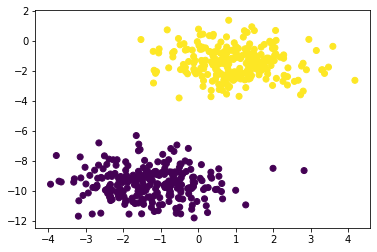

In [54]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [55]:
y = y.reshape(-1,1)

In [56]:
y.shape

(500, 1)

In [57]:
X_ = np.hstack((np.ones((500,1)), X))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

### Logistic Regression

In [60]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1*x))

In [61]:
sigmoid(np.array([6,2,-4,10,-500]))

array([9.97527377e-001, 8.80797078e-001, 1.79862100e-002, 9.99954602e-001,
       7.12457641e-218])

In [62]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return sigmoid(np.dot(X,theta))

In [63]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    y_hat = hypothesis(X, theta)  # (m,1)
    err = (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

    return -1 * err

In [64]:
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """

    y_hat = hypothesis(X, theta)
    grad = np.dot(X.T, (y_hat - y))

    return grad / X.shape[0]

In [73]:
def gradient_descent(X, y, lr =0.5, max_itr = 500):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [74]:
X_train.shape

(335, 3)

In [75]:
opt_theta, error_list = gradient_descent(X_train,y_train)

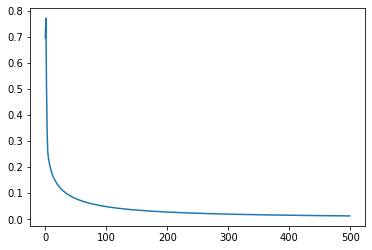

In [76]:
plt.plot(error_list)

In [77]:
opt_theta

array([[5.38282715],
       [1.19101276],
       [1.12250365]])

In [78]:
x1_rv = np.arange(-4,5)

In [79]:
x2_rv = -(opt_theta[0]+ opt_theta[1]* x1_rv) / opt_theta[2]

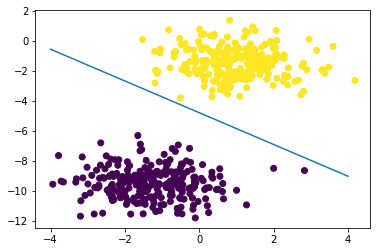

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1_rv, x2_rv)
plt.show()

In [89]:
y_pred = hypothesis(X_test, opt_theta)

In [93]:
y_pred = np.round(y_pred) #Rounding up the probabilities given by sigmoid function.

In [94]:
(y_pred == y_test).mean()  #100% accuracy

1.0

#### Sklearn

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()

In [98]:
model.fit(X_train,y_train)

C:\Users\shaur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
model.score(X_train,y_train)

1.0

In [100]:
model.score(X_test,y_test)

1.0

In [101]:
y_pred1 = model.predict(X_test)

In [105]:
model.intercept_

array([9.25520576])

In [106]:
model.coef_

array([[-1.21790800e-06,  5.60363665e-01,  1.72723229e+00]])